In [1]:
pip install matplotlib, pandas, openpyxl, scikit-learn, plotly, --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'matplotlib,'

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
# Convert boolean array to numpy.uint8
bool_array = np.array([True, False, True])
uint8_array = bool_array.astype(np.uint8)

NameError: name 'np' is not defined

## Dimensionality Reduction: Principal Component Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
encoded_data = pd.read_excel('Datasets/Encoded_Data_for_Model_Training_long.xlsx')

In [ ]:
encoded_data.head(3)

,age,income,gender_female,gender_male,gender_non binary,ethnicity_hispanic,ethnicity_non hispanic,race_Colombia,race_Mexican,race_Puerto Rican,...,language_both,language_english,language_spanish,language_undisclosed,disability_i do not have a disability,disability_undisclosed,choice_Empathetic,choice_Original,choice_Persuasive,choice_Simplier
0,3,1,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,0,0,False,True,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,0,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False


c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



ValueError: num must be an integer with 1 <= num <= 4, not 5

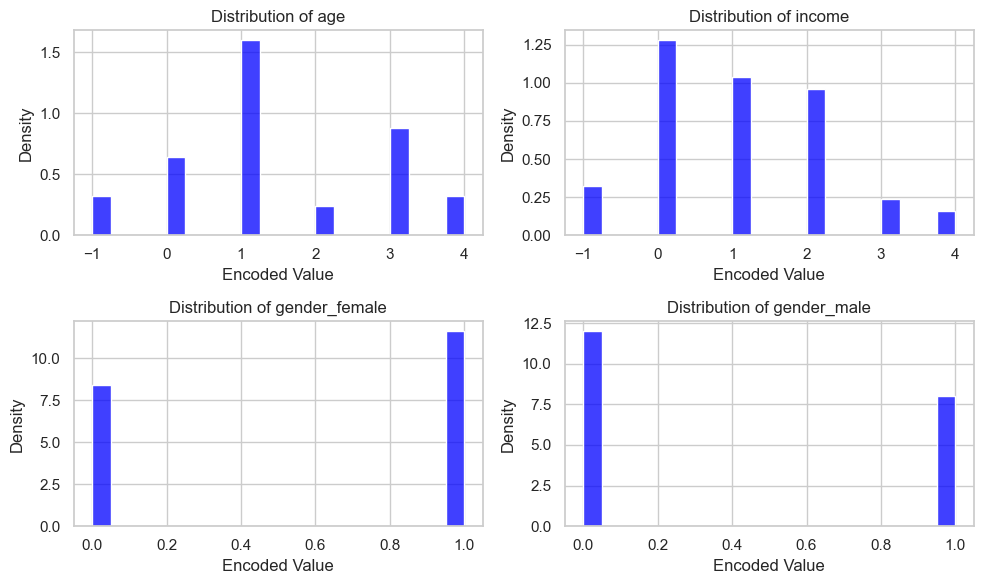

In [ ]:
import seaborn as sns
# Plot histograms of encoded variables using seaborn
sns.set(style="whitegrid")  # Set seaborn style
plt.figure(figsize=(10, 6))  # Set figure size

# Loop through each encoded variable and plot its histogram
for i, col in enumerate(encoded_data.columns):
    plt.subplot(2, 2, i+1)  # Create subplot for each variable
    sns.histplot(encoded_data[col], bins=20, kde=False, color='blue', stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Encoded Value')
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

c:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



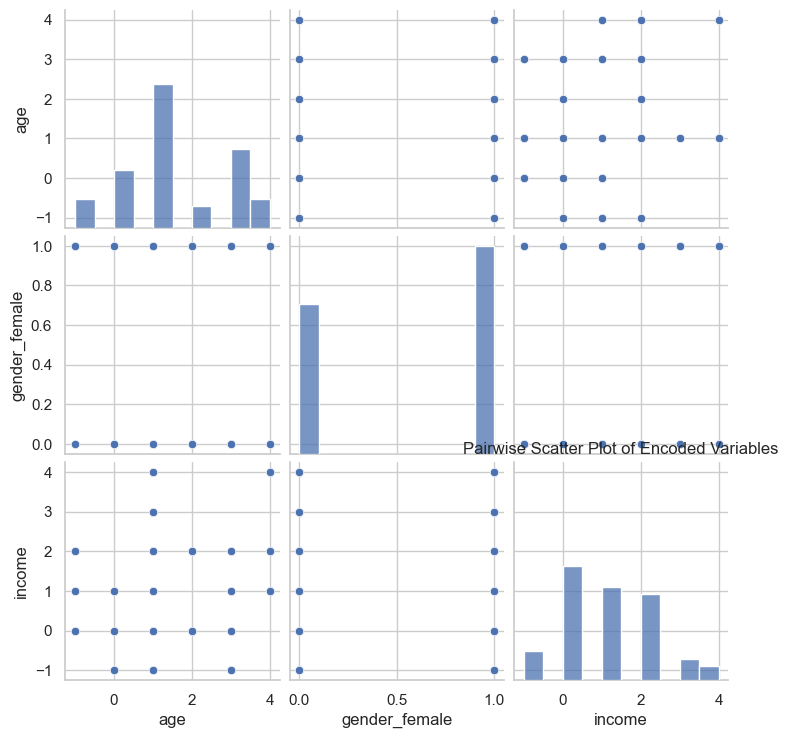

In [ ]:
# Create pairwise scatter plot
sns.pairplot(encoded_data[['age', 'gender_female', 'income']])
plt.title('Pairwise Scatter Plot of Encoded Variables')
plt.show()

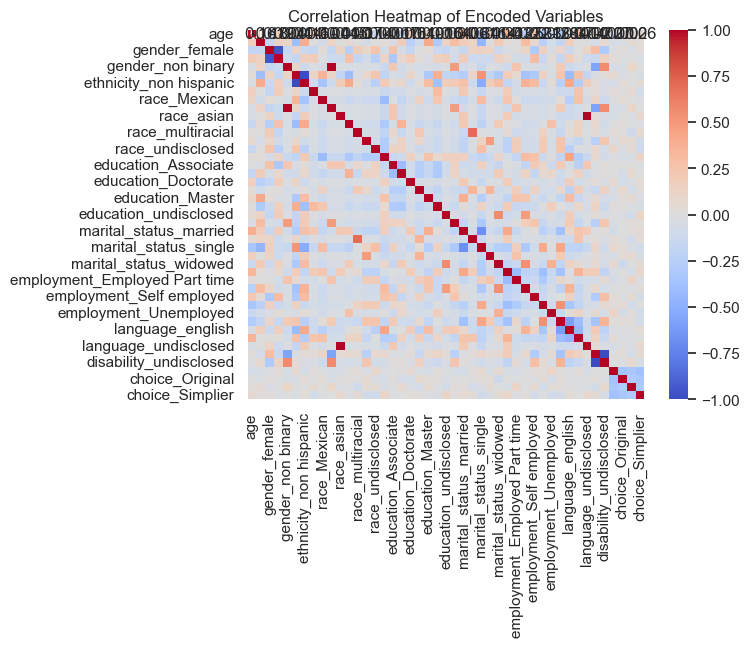

In [ ]:
# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Encoded Variables')
plt.show()

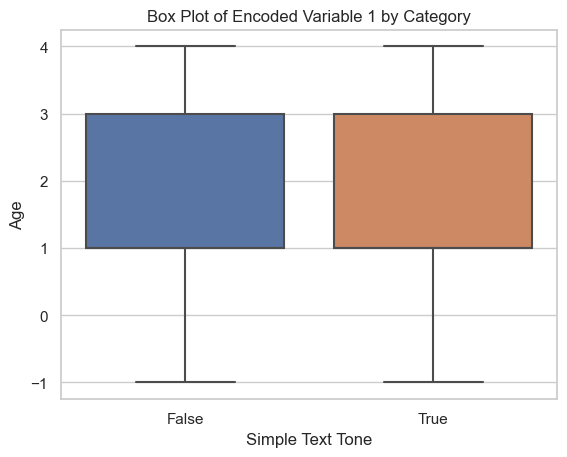

In [ ]:
# Plot box plots of encoded variables
sns.boxplot(x='choice_Simplier', y='age', data=encoded_data)
plt.title('Box Plot of Encoded Variable 1 by Category')
plt.xlabel('Simple Text Tone')
plt.ylabel('Age')
plt.show()

## Standardize the data

In [ ]:
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded_data)


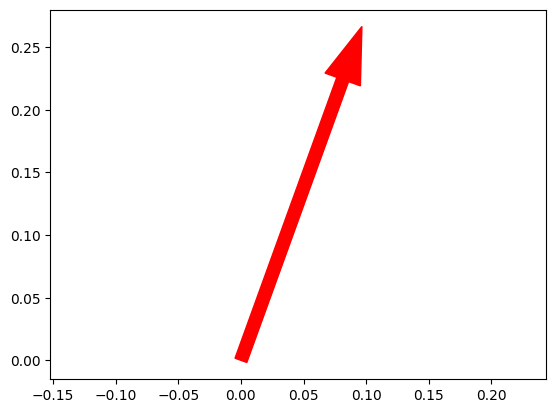

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(encoded_scaled)
# Calculate the mean of the data
mean = np.mean(encoded_scaled, axis=0) 

# Assuming 'pca' is your PCA object
first_pc = pca.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on the same scale
plt.axis('equal')
plt.show()


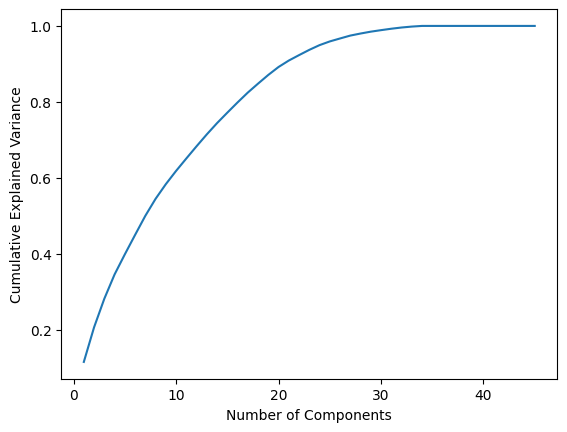

In [ ]:
pca = PCA()
pca.fit(encoded_scaled)
# Elbow method to determine optinal number of components
# Proportion of variance explained criterion
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

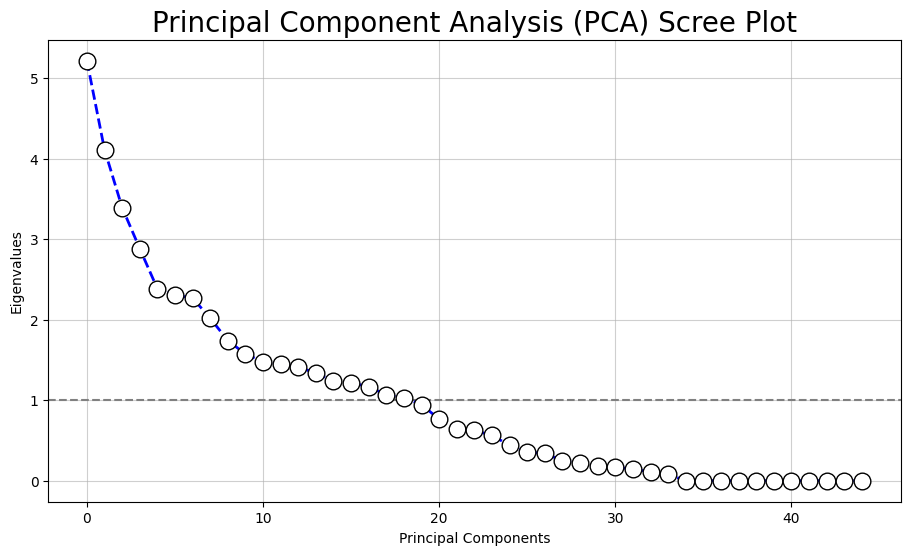

In [ ]:
# Scree plot criterion for selecting principal components
covar_matrix = PCA(n_components = len(encoded_data.columns))
covar_matrix.fit(encoded_scaled)

# visualizing the eigenvalues obtained from performing Principal Component Analysis (PCA) on the dataset and identifying significant components based on a threshold (in this case, eigenvalues greater than 1) 
# Once a principal component's eigenvalue is on or below the threshold, it suggests that the corresponding principal component may not explain a significant amount of variance in the data

fig, ax = plt.subplots(figsize=(11, 6)) 

plt.ylabel('Eigenvalues')
plt.xlabel('Principal Components')
plt.title('Principal Component Analysis (PCA) Scree Plot', fontsize=20)
plt.style.context('seaborn-whitegrid')

# plt.xticks(range(len(covar_matrix.explained_variance_)))
for x_position in range(len(covar_matrix.explained_variance_)):
    plt.scatter(x_position, covar_matrix.explained_variance_[x_position])

plt.axhline(y=1, color='gray', linestyle='--')
plt.plot(covar_matrix.explained_variance_, color='blue', marker='o', linestyle='--', linewidth=2, markersize=12, markerfacecolor='white', markeredgecolor='black')

plt.grid(True, linestyle='-', alpha=0.6)
plt.savefig('PCA_Scree_Plot.png')
plt.show()


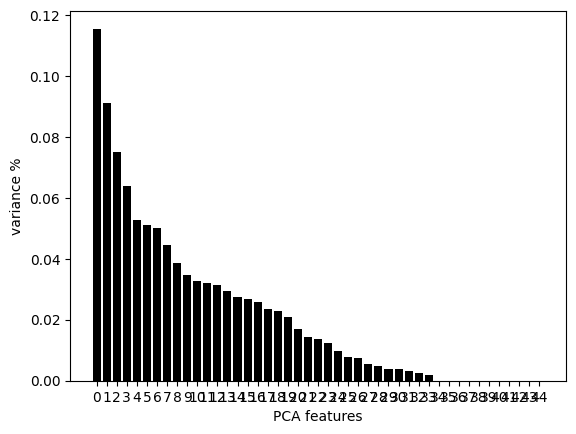

In [ ]:
# the explained variance ratio of each principal component obtained from PCA-variance drop off point is 3
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.savefig('PCA_Features.png')
plt.show()

## Train PCA model with number of principal components

In [ ]:
# PCA Implementation w the optimal # of components
pca = PCA(n_components = 3)
pca.fit(encoded_scaled)
pca_features = pca.transform(encoded_scaled)

In [ ]:
print(pca.explained_variance_ratio_)


[0.11561221 0.09113789 0.07518937]


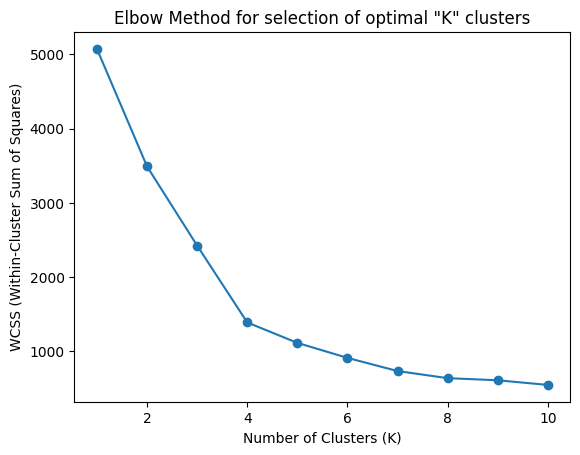

In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.361025949105237
For n_clusters = 3, the average silhouette score is: 0.43167346754086267
For n_clusters = 4, the average silhouette score is: 0.4831857703131137
For n_clusters = 5, the average silhouette score is: 0.5066423238306375
For n_clusters = 6, the average silhouette score is: 0.4862304753987896
For n_clusters = 7, the average silhouette score is: 0.4567987426599497


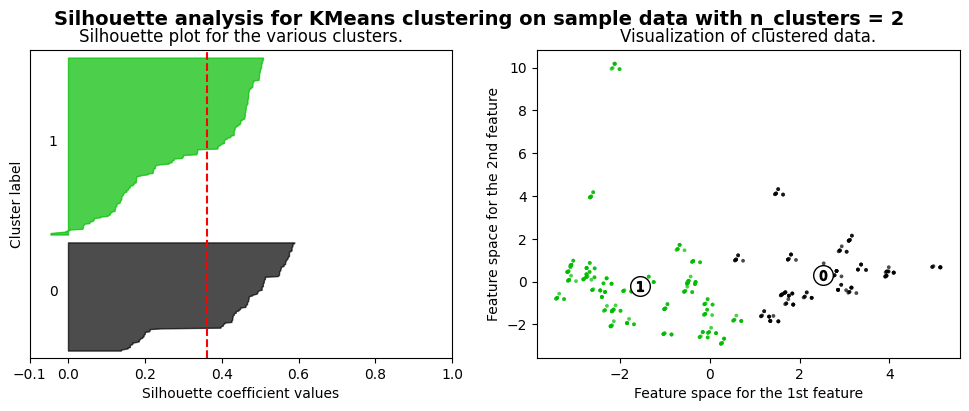

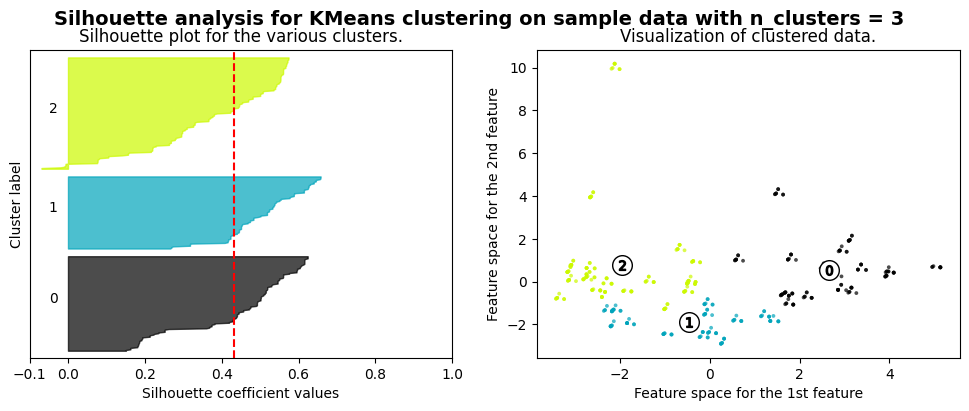

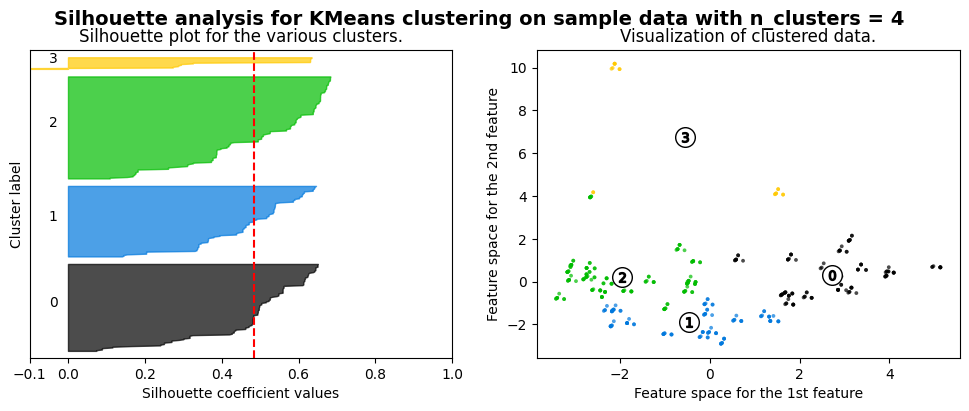

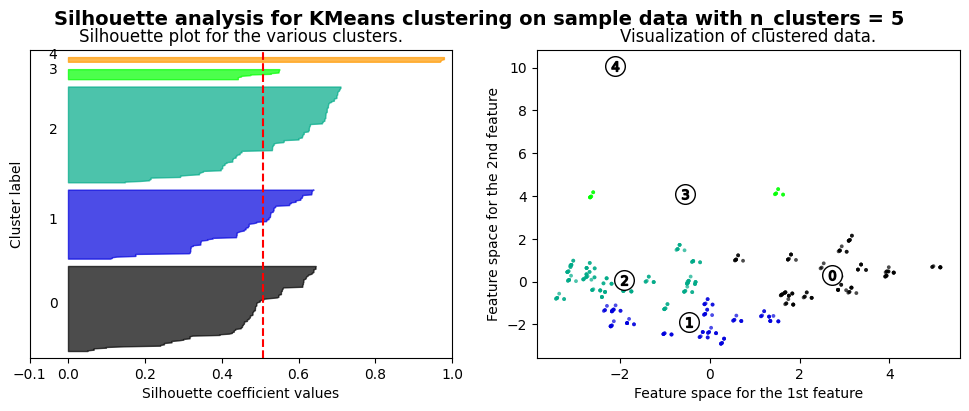

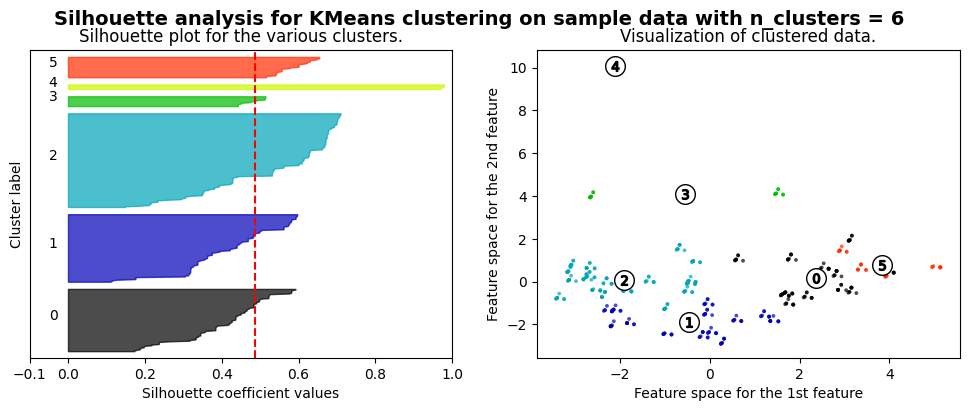

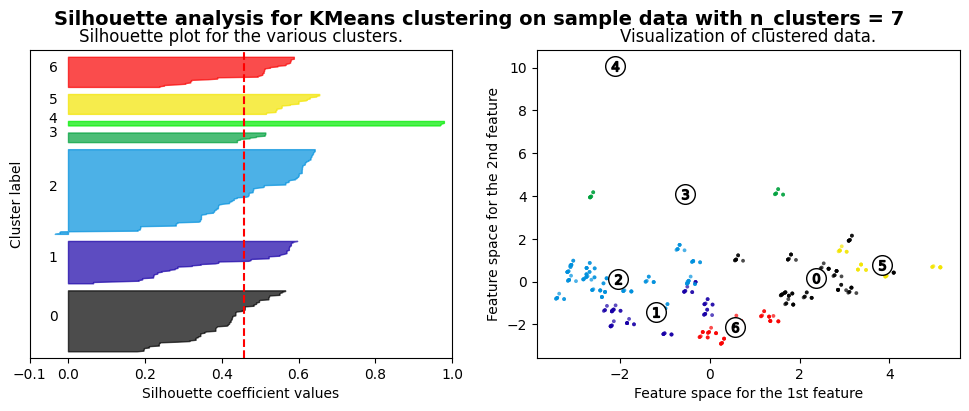

In [ ]:
# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(pca_features) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(pca_features)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(pca_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_features[:, 0], pca_features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')




plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(pca_features)

In [ ]:
cluster_labels

array([2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 2, 4, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,

In [ ]:
# Assuming 'pca_features' contains the principal components obtained from PCA

# Compute the explained variance ratio
explained_variance_ratio = np.var(pca_features, axis=0) / np.sum(np.var(pca_features, axis=0))

# Print the explained variance ratio for each principal component
print('Explained variation per principal component: {}'.format(explained_variance_ratio))


Explained variation per principal component: [0.41006039 0.32325339 0.26668621]


In [ ]:
# Image will be displayed in the readme file as well
import plotly.express as px

# Scatter plot of data points
fig = px.scatter(x=pca_features[:, 0], y=pca_features[:, 1], color=cluster_labels, opacity=0.5, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'}, title='K-Means Clustering with Centroids', template='plotly_white')

# Scatter plot of centroids
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(symbol='diamond', size=10, color='red'), name='Centroids')

fig.show()

In [ ]:
loadings = pca.components_

# Absolute loadings
abs_loadings = np.abs(loadings)

# Identify important features for each principal component
n_top_features = 24  # Number of top features to display
for i, component in enumerate(abs_loadings):
    top_indices = np.argsort(component)[::-1][:n_top_features]
    top_features = [list(encoded_data.columns)[index] for index in top_indices]
    print(f"Principal Component {i+1}: Top {n_top_features} features - {top_features}")

Principal Component 1: Top 24 features - ['ethnicity_non hispanic', 'ethnicity_hispanic', 'marital_status_single', 'language_english', 'language_both', 'income', 'marital_status_married', 'employment_Retired', 'employment_Student', 'race_white', 'marital_status_widowed', 'education_Master', 'gender_male', 'race_undisclosed', 'race_Mexican', 'gender_female', 'education_undisclosed', 'race_black', 'race_native american', 'employment_Self employed', 'education_less than high school', 'marital_status_divorced', 'education_Associate', 'age']
Principal Component 2: Top 24 features - ['disability_undisclosed', 'disability_i do not have a disability', 'race_Puerto Rican ', 'gender_non binary', 'employment_Employed Full time', 'marital_status_divorced', 'language_spanish', 'language_both', 'education_less than high school', 'employment_Self employed', 'race_Mexican', 'employment_Employed Part time', 'education_Associate', 'race_native american', 'ethnicity_hispanic', 'ethnicity_non hispanic', '

In [ ]:
loadings

array([[ 0.08125834,  0.22424872, -0.14334604,  0.16091059, -0.05771507,
        -0.34316028,  0.34316028,  0.0077757 , -0.15359691, -0.05771507,
         0.04900266,  0.12877884, -0.02723677, -0.10950216, -0.16001483,
         0.19267914, -0.08454666,  0.06104239,  0.03910736, -0.05867347,
         0.17435593, -0.0937461 ,  0.13914971,  0.09268898,  0.22010622,
        -0.02624129, -0.32683572, -0.0187003 ,  0.18345297,  0.04712262,
        -0.07294759,  0.21689135,  0.10411379, -0.1988551 ,  0.03747726,
        -0.2688941 ,  0.26941265, -0.02685094,  0.04900266,  0.05207821,
        -0.05207821, -0.03064486, -0.01782077,  0.0010719 ,  0.04874402],
       [-0.09978476,  0.11246649, -0.1002662 ,  0.00080945,  0.35064776,
        -0.11599755,  0.11599755, -0.09792308, -0.14277427,  0.35064776,
        -0.03592686, -0.01373626, -0.06349803,  0.11600421,  0.01208013,
         0.00761751,  0.11848916,  0.01681217, -0.0635118 ,  0.01165914,
         0.02364329, -0.16908685,  0.02347394,  0.

In [ ]:
principal_components_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PCA4'])

ValueError: Shape of passed values is (400, 3), indices imply (400, 4)

In [ ]:
principal_components_df.tail()

,PC1,PC2,PC3,PCA4
395,1.658593,-0.543909,-0.750205,1.331553
396,1.809746,1.262435,-0.442900,-0.695432
397,-2.183693,-0.104108,-1.727793,-0.530189
398,0.632404,1.224209,-0.674881,-1.460822
399,3.153459,-0.287371,0.822393,-0.640307


## TSNE

 The point in the plot represents a data instance, and the position of each point reflects its embedding in the lower-dimensional space created by t-SNE

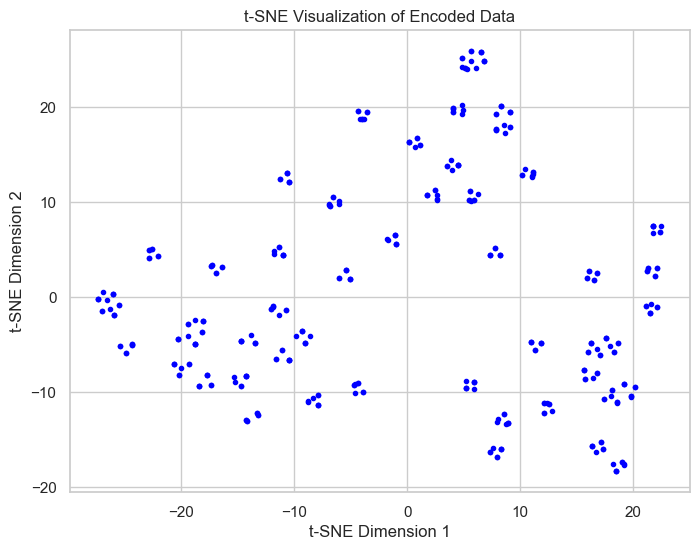

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)

tsne_encoded_data = tsne.fit_transform(encoded_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_encoded_data[:, 0], tsne_encoded_data[:, 1], c='blue', marker='.')
plt.title('t-SNE Visualization of Encoded Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()